# objective:
# Proposed Aim
A telecommunications company is concerned about the number of customers leaving their landline business for cable competitors. They need to understand who is leaving. Imagine that you’re an analyst at this company and you have to find out who is leaving and why.

# Additional Aim
In addition to the proposed aim, stakeholders might be interested to know where the major revenue comes from, and what incentives they can offer to potential customers in order to increase customer retention and the revenue.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn=pd.read_csv(r"C:\ksr\data science\DS_batch1\Practical_dataset\EDA\telecom_churn.csv")

In [3]:
churn.shape

(7043, 21)

# some of the facts need to identify

1. how many number of recrods and columns in given dataset?
2. what are meanings of each and every columns?
3. is formats of the data is correct?
4. print the a few records of the snapshot of a data?



In [4]:
churn.shape

(7043, 21)

In [5]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
churn.head() # by default print first 5 records

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
churn.tail() # it prints last 5 records 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


# removing the duplicate records at row level

In [9]:
churn=churn.drop_duplicates(keep="last")
churn.shape

(7043, 21)

In [10]:
churn.nunique() # it tells number of unique values for each columns

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
churn["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [3]:
churn["Churn"].value_counts()/len(churn)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

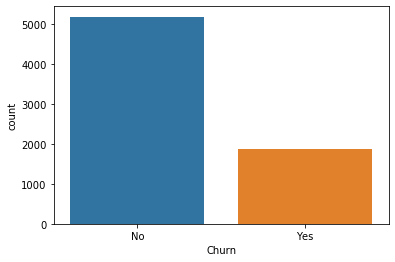

In [13]:
sns.countplot(churn["Churn"])

In [14]:
def summary_numerical_data(data):
    abc=data.describe().T
    abc["5%"]=data.quantile(0.05)
    abc["95%"]=data.quantile(0.95)
    abc["99.7%"]=data.quantile(0.997)
    abc["Missing%"]=(len(data)-abc["count"])/len(data)*100
    abc["skew"]=data.skew()
    abc["kurtosis"]=data.kurtosis()
    abc1=abc[["count","min","5%","25%","50%","mean","75%","95%","99.7%","max","std","Missing%","skew","kurtosis"]]
    abc1.to_excel("C:\\Users\\Koti\\Documents\\Data_Science\\DS_FEB_2020\\reports\\EDA_telecom_06_04_2020\\summary_stat.xls",sheet_name="numerical_summary")
    return abc1

In [15]:
summary_numerical_data(data=churn)

,count,min,5%,25%,50%,mean,75%,95%,99.7%,max,std,Missing%,skew,kurtosis
SeniorCitizen,7043.0,0.00,0.00,0.00,0.00,0.162147,0.00,1.000,1.0000,1.00,0.368612,0.0,1.833633,1.362596
tenure,7043.0,0.00,1.00,9.00,29.00,32.371149,55.00,72.000,72.0000,72.00,24.559481,0.0,0.239540,-1.387372
MonthlyCharges,7043.0,18.25,19.65,35.50,70.35,64.761692,89.85,107.400,116.4437,118.75,30.090047,0.0,-0.220524,-1.257260
TotalCharges,7043.0,0.00,48.60,398.55,1394.55,2279.734304,3786.60,6921.025,8396.1134,8684.80,2266.794470,0.0,0.963235,-0.228580


In [16]:
def summary_numerical_data(data):
    abc=data.describe().T
    abc["5%"]=data.quantile(0.05)
    abc["95%"]=data.quantile(0.95)
    abc["99.7%"]=data.quantile(0.997)
    abc["Missing%"]=(len(data)-abc["count"])/len(data)*100
    abc["skew"]=data.skew()
    abc["kurtosis"]=data.kurtosis()
    abc1=abc[["count","min","5%","25%","50%","mean","75%","95%","99.7%","max","std","Missing%","skew","kurtosis"]]
    abc1.to_excel("C:\\Users\\Koti\\Documents\\Data_Science\\DS_FEB_2020\\reports\\EDA_telecom_06_04_2020\\summary_stat.xls",sheet_name="numerical_summary")
    return abc1

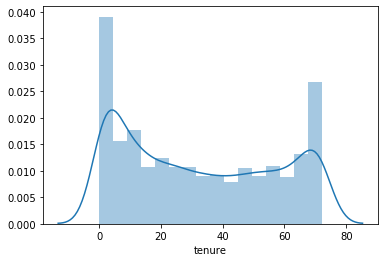

In [17]:
sns.distplot(churn["tenure"])

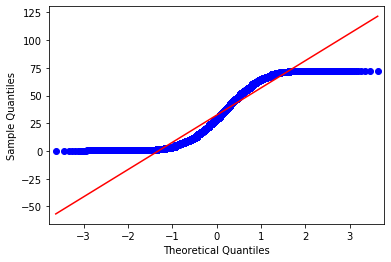

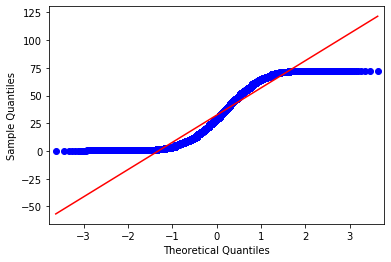

In [18]:
from statsmodels.graphics.gofplots import qqplot
qqplot(churn["tenure"],line="s")

In [21]:
abc=churn["OnlineSecurity"].value_counts()/len(churn)

In [22]:
type(abc)

pandas.core.series.Series

In [26]:
abc1=pd.DataFrame(abc).reset_index()

In [29]:
abc1.rename(columns={abc1.columns[0]:"OnlineSecurity",abc1.columns[1]:"onlinesecurity_percent"},inplace=True)

In [30]:
abc1

,OnlineSecurity,onlinesecurity_percent
0,No,0.496663
1,Yes,0.286668
2,No internet service,0.216669


In [31]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [34]:
churn1=churn[['PhoneService', 'MultipleLines', 'InternetService','tenure']]

In [35]:
churn1.head()

,PhoneService,MultipleLines,InternetService,tenure
0,No,No phone service,DSL,1
1,Yes,No,DSL,34
2,Yes,No,DSL,2
3,No,No phone service,DSL,45
4,Yes,No,Fiber optic,2


In [106]:
def char_summary(df):
    col=list(df.columns)
    abc1=pd.DataFrame()
    for i in col:
            
        if df[i].dtypes=="object":
                       
            abc=pd.DataFrame(round(df[i].value_counts()/len(df)*100,2)).reset_index()
            abc.rename(columns={abc.columns[0]:i,abc.columns[1]:i+"_percent"},inplace=True)
            abc2=abc.append(abc1)
            print(abc2)
            print("frequnecy for  ********  ",i,"\n")
            #print(abc)
            print("\n")
    abc2.to_excel("C:\\Users\\Koti\\Documents\\Data_Science\\DS_FEB_2020\\reports\\EDA_telecom_06_04_2020\\summary_stat.xls",sheet_name="char_summary")
       

In [107]:
char_summary(df=churn1)

  PhoneService  PhoneService_percent
0          Yes                 90.32
1           No                  9.68
frequnecy for  ********   PhoneService 



      MultipleLines  MultipleLines_percent
0                No                  48.13
1               Yes                  42.18
2  No phone service                   9.68
frequnecy for  ********   MultipleLines 



  InternetService  InternetService_percent
0     Fiber optic                    43.96
1             DSL                    34.37
2              No                    21.67
frequnecy for  ********   InternetService 





In [90]:
abc1=pd.DataFrame()

In [91]:
abc1

""


In [92]:
abc=pd.DataFrame(churn["OnlineSecurity"].value_counts()/len(churn)).reset_index()

In [93]:
abc

,index,OnlineSecurity
0,No,0.496663
1,Yes,0.286668
2,No internet service,0.216669


In [95]:
abc2=abc.append(abc1)

In [96]:
abc2

,index,OnlineSecurity
0,No,0.496663
1,Yes,0.286668
2,No internet service,0.216669


In [97]:
abc3=abc1.append(abc)
abc3

,index,OnlineSecurity
0,No,0.496663
1,Yes,0.286668
2,No internet service,0.216669


In [109]:
churn.select_dtypes(include='object').describe().T

,count,unique,top,freq
customerID,7043,7043,3563-SVYLG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [110]:
import pandas as pd
def summary_analysis(data1):
    df_numeric = pd.DataFrame()
    #cnt=0
    print('total Rows:',data1.shape)
    data=data1.drop_duplicates(keep="last")
    print('After duplicate deleted:',data.shape)
    print('Start of Numerical Analysis')
    for i,value in enumerate(data):        
        if data[value].dtypes !='object':  
            #cnt+=1
            print('Numeric Column:',value)
            iqr=data[value].quantile(0.75)-data[value].quantile(0.25)            
            summary_stat=pd.DataFrame(
                         {'Lo':[data[value].quantile(0.25)-1.5*iqr],
                          'Uo':[data[value].quantile(0.75)+1.5*iqr],
                          'Max':[data[value].max()],
                          'Min':[data[value].min()],
                          'Count':[data[value].count()],
                          'Mean':[data[value].mean()],
                          'Std':[data[value].std()],
                          '25%':[data[value].quantile(0.25)],
                          '50%':[data[value].quantile(0.50)],
                          '75%':[data[value].quantile(0.75)],
                          '100%':[data[value].quantile(1.00)],
                          'Skew':[data[value].skew()],
                          'kurtosis':[data[value].kurtosis()],
                          'Missing':[(len(data)-data[value].count())/len(data)*100]
                         }
                         )
            df_numeric=df_numeric.append(summary_stat,ignore_index=True)
            #df_numeric.rename(index={0: 'SeniorCitizen',1:'tenure',2:'MonthlyCharges',3:'TotalCharges'}, inplace = True) 
           # df_numeric.to_excel(r'C:\Users\SESA466544\Desktop\Desktop18Feb2020\Python\DS\Datasets\numeric_summary_stat.xlsx')
    print('End of Numerical Analysis','\n')
    print('Start of Categorical Analysis')
    df_cate = pd.DataFrame()
    cat=data.select_dtypes(include='object').describe().T
    print('Categorical Columns:',data.dtypes[(data.dtypes=='object')].index)
    df_cate=df_cate.append(cat)
    #df_cate.to_excel(r'C:\Users\SESA466544\Desktop\Desktop18Feb2020\Python\DS\Datasets\cat_summary_stat.xlsx')
    return

In [111]:
summary_analysis(data1=churn1)

total Rows: (7043, 4)
After duplicate deleted: (505, 4)
Start of Numerical Analysis
Numeric Column: tenure
End of Numerical Analysis 

Start of Categorical Analysis
Categorical Columns: Index(['PhoneService', 'MultipleLines', 'InternetService'], dtype='object')


In [114]:
miss_identify=lambda x:x.isnull().sum()/len(x)*100

In [115]:
miss_identify(churn)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [133]:
def outlier_detection(df):
    df1=df.select_dtypes(include=['int64','float64'])
    return df1

In [134]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [131]:
outlier_detection(df=churn)

,MonthlyCharges,TotalCharges
0,29.85,29.85
1,56.95,1889.50
2,53.85,108.15
3,42.30,1840.75
4,70.70,151.65
...,...,...
7038,84.80,1990.50
7039,103.20,7362.90
7040,29.60,346.45
7041,74.40,306.60


In [135]:
churn1.head()

,PhoneService,MultipleLines,InternetService,tenure
0,No,No phone service,DSL,1
1,Yes,No,DSL,34
2,Yes,No,DSL,2
3,No,No phone service,DSL,45
4,Yes,No,Fiber optic,2


In [136]:
churn2=pd.get_dummies(churn1)

In [137]:
churn2.head()

,tenure,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,1,0,0,1,0,1,0,0
1,34,0,1,1,0,0,1,0,0
2,2,0,1,1,0,0,1,0,0
3,45,1,0,0,1,0,1,0,0
4,2,0,1,1,0,0,0,1,0


In [138]:
churn2.dtypes

tenure                            int64
PhoneService_No                   uint8
PhoneService_Yes                  uint8
MultipleLines_No                  uint8
MultipleLines_No phone service    uint8
MultipleLines_Yes                 uint8
InternetService_DSL               uint8
InternetService_Fiber optic       uint8
InternetService_No                uint8
dtype: object

In [142]:
churn2.select_dtypes(include=["int64","uint8"])

,tenure,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,1,0,0,1,0,1,0,0
1,34,0,1,1,0,0,1,0,0
2,2,0,1,1,0,0,1,0,0
3,45,1,0,0,1,0,1,0,0
4,2,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
7038,24,0,1,0,0,1,1,0,0
7039,72,0,1,0,0,1,0,1,0
7040,11,1,0,0,1,0,1,0,0
7041,4,0,1,0,0,1,0,1,0


In [143]:
bill=pd.read_csv(r"C:\ksr\data science\DS_batch1\datasets\Telecom Data Analysis\Bill.csv")

In [144]:
bill.head()

,cust_id,act_active_dt,package_id,bill_zip,customer_segment,status,bill_amt
0,9243148228,6/22/2006,54518.0,560095,S,ACTIVE,561.80
1,9243264060,6/23/2006,617691.0,580029,S,ACTIVE,224.35
2,8951061271,8/14/2010,616488.0,560037,F,ACTIVE,1689.04
3,8951033996,6/26/2010,616488.0,560062,R,ACTIVE,344.04
4,9241079722,9/30/2005,614975.0,560017,G - TC,ACTIVE,478.33


In [145]:
bill.dtypes

cust_id               int64
act_active_dt        object
package_id          float64
bill_zip              int64
customer_segment     object
status               object
bill_amt            float64
dtype: object

In [146]:
from datetime import date

In [147]:
bill["today_Date"]=date.today()

In [148]:
bill.head()

,cust_id,act_active_dt,package_id,bill_zip,customer_segment,status,bill_amt,today_Date
0,9243148228,6/22/2006,54518.0,560095,S,ACTIVE,561.80,2020-04-07
1,9243264060,6/23/2006,617691.0,580029,S,ACTIVE,224.35,2020-04-07
2,8951061271,8/14/2010,616488.0,560037,F,ACTIVE,1689.04,2020-04-07
3,8951033996,6/26/2010,616488.0,560062,R,ACTIVE,344.04,2020-04-07
4,9241079722,9/30/2005,614975.0,560017,G - TC,ACTIVE,478.33,2020-04-07


In [149]:
bill.dtypes

cust_id               int64
act_active_dt        object
package_id          float64
bill_zip              int64
customer_segment     object
status               object
bill_amt            float64
today_Date           object
dtype: object

In [155]:
bill["act_active_dt1"]=pd.to_datetime(bill["act_active_dt"])
bill["today_Date"]=pd.to_datetime(bill["today_Date"])

In [156]:
bill.head()

,cust_id,act_active_dt,package_id,bill_zip,customer_segment,status,bill_amt,today_Date,act_active_dt1
0,9243148228,6/22/2006,54518.0,560095,S,ACTIVE,561.80,2020-04-07,2006-06-22
1,9243264060,6/23/2006,617691.0,580029,S,ACTIVE,224.35,2020-04-07,2006-06-23
2,8951061271,8/14/2010,616488.0,560037,F,ACTIVE,1689.04,2020-04-07,2010-08-14
3,8951033996,6/26/2010,616488.0,560062,R,ACTIVE,344.04,2020-04-07,2010-06-26
4,9241079722,9/30/2005,614975.0,560017,G - TC,ACTIVE,478.33,2020-04-07,2005-09-30


In [157]:
bill.dtypes

cust_id                      int64
act_active_dt               object
package_id                 float64
bill_zip                     int64
customer_segment            object
status                      object
bill_amt                   float64
today_Date          datetime64[ns]
act_active_dt1      datetime64[ns]
dtype: object

In [158]:
bill["diff"]=bill["today_Date"]-bill["act_active_dt1"]

In [159]:
bill.head()

,cust_id,act_active_dt,package_id,bill_zip,customer_segment,status,bill_amt,today_Date,act_active_dt1,diff
0,9243148228,6/22/2006,54518.0,560095,S,ACTIVE,561.80,2020-04-07,2006-06-22,5038 days
1,9243264060,6/23/2006,617691.0,580029,S,ACTIVE,224.35,2020-04-07,2006-06-23,5037 days
2,8951061271,8/14/2010,616488.0,560037,F,ACTIVE,1689.04,2020-04-07,2010-08-14,3524 days
3,8951033996,6/26/2010,616488.0,560062,R,ACTIVE,344.04,2020-04-07,2010-06-26,3573 days
4,9241079722,9/30/2005,614975.0,560017,G - TC,ACTIVE,478.33,2020-04-07,2005-09-30,5303 days


In [165]:
bill.select_dtypes(include=["datetime"]).head()

,today_Date,act_active_dt1
0,2020-04-07,2006-06-22
1,2020-04-07,2006-06-23
2,2020-04-07,2010-08-14
3,2020-04-07,2010-06-26
4,2020-04-07,2005-09-30


In [166]:
bill.select_dtypes(include=["object"]).head()

,act_active_dt,customer_segment,status
0,6/22/2006,S,ACTIVE
1,6/23/2006,S,ACTIVE
2,8/14/2010,F,ACTIVE
3,6/26/2010,R,ACTIVE
4,9/30/2005,G - TC,ACTIVE


In [167]:
bill.select_dtypes(include=["int64","float64","int32","float32","uint8"]).head()

,cust_id,package_id,bill_zip,bill_amt
0,9243148228,54518.0,560095,561.80
1,9243264060,617691.0,580029,224.35
2,8951061271,616488.0,560037,1689.04
3,8951033996,616488.0,560062,344.04
4,9241079722,614975.0,560017,478.33


In [186]:
def outlier_detection(df):
    df1=df.select_dtypes(include=["int64","float64","int32","float32","uint8"])
    col=list(df1.columns)
    for i in col:
        if df1[i].nunique()>2:
            iqr=df1[i].quantile(0.75)-df1[i].quantile(0.25)
            lo=df1[i].quantile(0.25)-(1.5*iqr)
            uo=df1[i].quantile(0.75)+(1.5*iqr)
            print("lower cutoff value",i,lo)
            print("upper cut off value",i,uo)
            
    

In [187]:
outlier_detection(df=churn)

lower cutoff value tenure -60.0
upper cut off value tenure 124.0
lower cutoff value MonthlyCharges -46.02499999999999
upper cut off value MonthlyCharges 171.375
lower cutoff value TotalCharges -4683.525
upper cut off value TotalCharges 8868.675


In [190]:
# 2nd way for detecting the outliers
def outlier_detection(df):
    df1=df.select_dtypes(include=["int64","float64","int32","float32","uint8"])
    col=list(df1.columns)
    for i in col:
        if df1[i].nunique()>2:
            print("lower cut off value",i,df[i].quantile(0.05))
            print("upper cut off value",i,df[i].quantile(0.95))
            

In [191]:
outlier_detection(df=churn)

lower cut off value tenure 1.0
upper cut off value tenure 72.0
lower cut off value MonthlyCharges 19.65
upper cut off value MonthlyCharges 107.4
lower cut off value TotalCharges 48.6
upper cut off value TotalCharges 6921.024999999997


In [192]:
churn1=churn.select_dtypes(include=["int64","float64","int32","float32","uint8"])

In [194]:
churn1.min()

SeniorCitizen      0.00
tenure             0.00
MonthlyCharges    18.25
TotalCharges       0.00
dtype: float64

In [195]:
churn1.max()

SeniorCitizen        1.00
tenure              72.00
MonthlyCharges     118.75
TotalCharges      8684.80
dtype: float64

In [4]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
churn["Churn"].value_counts()/len(churn)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [6]:
pd.crosstab(churn["gender"],churn["Churn"])

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

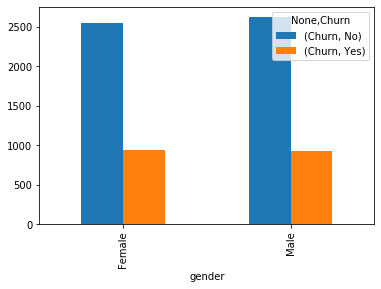

In [13]:

pd.pivot_table(index="gender",columns="Churn",aggfunc={"Churn":len},data=churn).plot(kind="bar")

In [17]:
cnt=pd.pivot_table(index="gender",columns="Churn",aggfunc={"Churn":len},data=churn)
cnt

Churn     
Churn     No  Yes
gender           
Female  2549  939
Male    2625  930

In [23]:
cnt.groupby(level=[0]).apply(lambda x:x/x.sum()).reset_index()

gender Churn     
Churn            No  Yes
0      Female   1.0  1.0
1        Male   1.0  1.0

In [24]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
churn["OnlineSecurity"].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [26]:
churn["Churn"]=np.where(churn["Churn"]=="No",0,1)

In [27]:
cnt=pd.pivot_table(index="gender",columns="Churn",aggfunc={"Churn":len},data=churn)
cnt

Churn     
Churn      0    1
gender           
Female  2549  939
Male    2625  930

In [28]:
cnt.groupby(level=[0]).apply(lambda x:x/x.sum()).reset_index()

gender Churn     
Churn             0    1
0      Female   1.0  1.0
1        Male   1.0  1.0

In [29]:
cnt=pd.pivot_table(index="OnlineSecurity",columns="Churn",aggfunc={"Churn":len},data=churn)
cnt

Churn      
Churn                   0     1
OnlineSecurity                 
No                   2037  1461
No internet service  1413   113
Yes                  1724   295

In [30]:
cnt.groupby(level=[0]).apply(lambda x:x/x.sum()).reset_index()

OnlineSecurity Churn     
Churn                          0    1
0                       No   1.0  1.0
1      No internet service   1.0  1.0
2                      Yes   1.0  1.0

In [32]:
churn['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [33]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [41]:
cnt=churn[["gender","Churn"]].groupby(["gender","Churn"]).size()

In [42]:
cnt.groupby(level=[0]).apply(lambda x:x/x.sum()).reset_index()

,gender,Churn,0
0,Female,0,0.730791
1,Female,1,0.269209
2,Male,0,0.738397
3,Male,1,0.261603


In [39]:
cnt=churn[["SeniorCitizen","Churn"]].groupby(["SeniorCitizen","Churn"]).size()
cnt

SeniorCitizen  Churn
0              0        4508
               1        1393
1              0         666
               1         476
dtype: int64

In [40]:
cnt.groupby(level=[0]).apply(lambda x:x/x.sum()).reset_index()

,SeniorCitizen,Churn,0
0,0,0,0.763938
1,0,1,0.236062
2,1,0,0.583187
3,1,1,0.416813


In [43]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [44]:
churn["Partner"].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [47]:

cnt1=churn[["Partner","Churn"]].groupby(["Partner","Churn"]).size()
cnt1

Partner  Churn
No       0        2441
         1        1200
Yes      0        2733
         1         669
dtype: int64

In [49]:
cnt1.groupby(level=[0]).apply(lambda x:x/x.sum()).reset_index()

,Partner,Churn,0
0,No,0,0.670420
1,No,1,0.329580
2,Yes,0,0.803351
3,Yes,1,0.196649


In [50]:
cnt1.groupby(level=[1]).apply(lambda x:x/x.sum()).reset_index()

,Partner,Churn,0
0,No,0,0.471782
1,No,1,0.642055
2,Yes,0,0.528218
3,Yes,1,0.357945


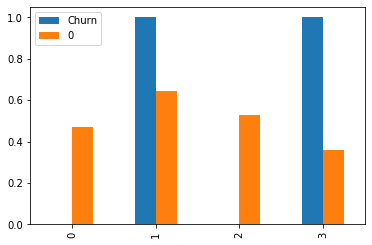

In [56]:
cnt2=cnt1.groupby(level=[1]).apply(lambda x:x/x.sum()).reset_index().plot(kind="bar")


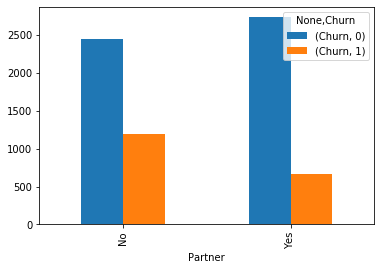

In [57]:
pd.pivot_table(index="Partner",columns="Churn",aggfunc={"Churn":len},data=churn).plot(kind="bar")

In [58]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

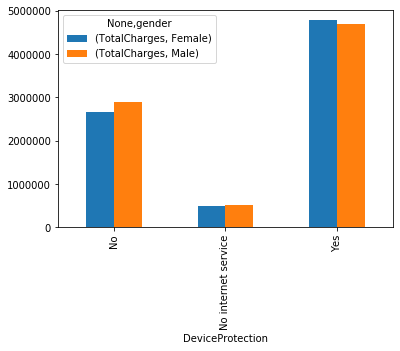

In [74]:
pd.pivot_table(index="DeviceProtection",columns='gender',aggfunc={"TotalCharges":sum},data=churn).plot(kind="bar")

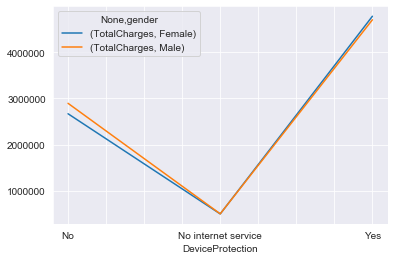

In [84]:
import seaborn as sns
sns.set_style("darkgrid")
pd.pivot_table(index="DeviceProtection",columns='gender',aggfunc={"TotalCharges":sum},data=churn).plot()

In [86]:
fb=pd.read_csv(r"C:\ksr\data science\DS_batch1\datasets\Fiberbits_v1.csv")

In [87]:
fb.shape

(100000, 9)

In [88]:
fb.head()

,active_cust,income,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,0,1586,85,4,1,0,121,4,85
1,0,1581,85,4,1,0,133,4,85
2,0,1594,82,4,1,0,118,4,85
3,0,1594,82,4,1,0,123,4,85
4,1,1609,80,4,1,0,177,4,85


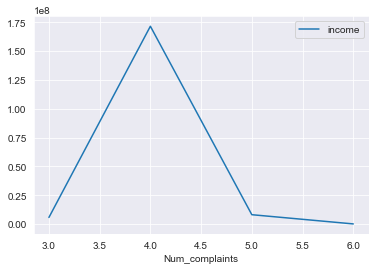

In [92]:
sns.set_style("darkgrid")
pd.pivot_table(index="Num_complaints",aggfunc={"income":sum},data=fb).plot()

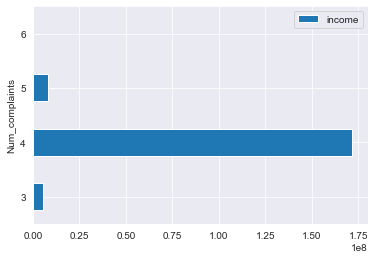

In [94]:
sns.set_style("darkgrid")
pd.pivot_table(index="Num_complaints",aggfunc={"income":sum},data=fb).plot(kind="barh")

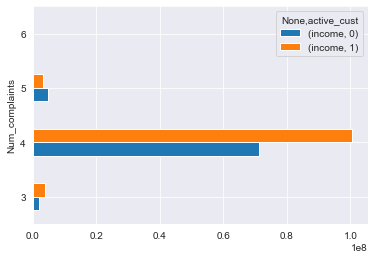

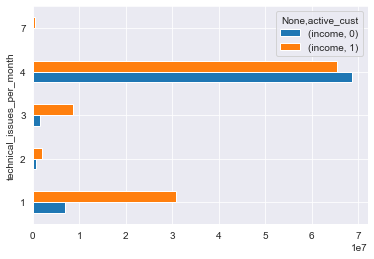

In [98]:
sns.set_style("darkgrid")
pd.pivot_table(index="Num_complaints",columns="active_cust",aggfunc={"income":sum},data=fb).plot(kind="barh")
pd.pivot_table(index="technical_issues_per_month",columns="active_cust",aggfunc={"income":sum},data=fb).plot(kind="barh")

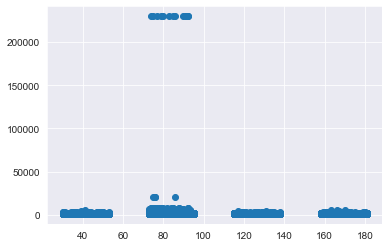

In [99]:
plt.scatter(fb["monthly_bill"],fb["income"])

In [102]:
def abc(data,ind,col,agg):
    sns.set_style("whitegrid")
    pd.pivot_table(index=ind,columns=col,aggfunc={agg:sum},data=data).plot(kind="barh")
    plt.show()

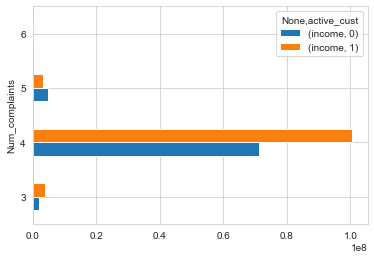

In [103]:
abc(data=fb,ind="Num_complaints",col="active_cust",agg="income")

In [104]:
fb.columns

Index(['active_cust', 'income', 'months_on_network', 'Num_complaints',
       'number_plan_changes', 'relocated', 'monthly_bill',
       'technical_issues_per_month', 'Speed_test_result'],
      dtype='object')

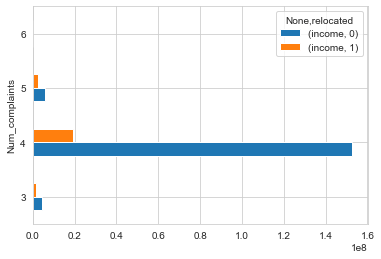

In [105]:
abc(data=fb,ind="Num_complaints",col="relocated",agg="income")

In [111]:
fb["income_bin"]=pd.qcut(fb["income"],q=4,labels=["1:grp1(1-1000)","2:grp2(1000-3000)","3:grp3(3000-5000)","4:grp4(>5000)"])

In [112]:
fb["income_bin"].value_counts()

1:grp1(1-1000)       25202
2:grp2(1000-3000)    24951
3:grp3(3000-5000)    24936
4:grp4(>5000)        24911
Name: income_bin, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

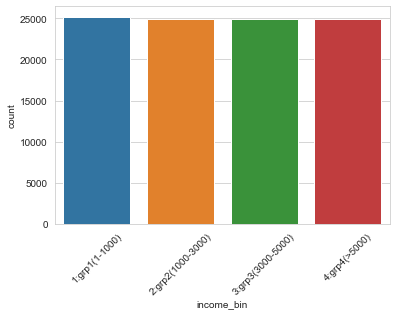

In [114]:
sns.countplot(fb["income_bin"])
plt.xticks(rotation=45)

count    100000.000000
mean       1855.279910
std        2712.385257
min        1130.000000
25%        1674.000000
50%        1805.000000
75%        1907.000000
max      229821.000000
Name: income, dtype: float64


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

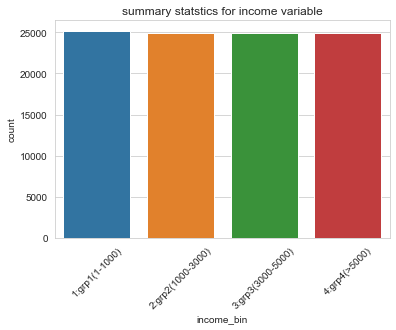

In [122]:
plt.title("summary statstics for income variable")
print(fb["income"].describe().T)
fb["income_bin"]=pd.qcut(fb["income"],q=4,labels=["1:grp1(1-1000)","2:grp2(1000-3000)","3:grp3(3000-5000)","4:grp4(>5000)"])
sns.countplot(fb["income_bin"])
plt.xticks(rotation=45)
